In [1]:
import re
import nltk
import pyreadr
import pickle

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

In [19]:
def plot_groups(components):

    n_components = len(components)

    rows = int(n_components / 3) + 1
    cols = 3

    fig, axs = plt.subplots(nrows=rows, ncols=cols, figsize=(12, 3 * rows))
                            
    cmap = plt.get_cmap("gist_ncar")
    cmaps = cmap(np.linspace(0, 1, n_components))


    # add values to subplots
    for i in range(n_components):

        terms = components.iloc[i].nlargest(n=10).index.to_list()
        values = components.iloc[i].nlargest(n=10).values

        plt_x = int(i / cols)
        plt_y = i % cols

        axs[plt_x, plt_y].barh(terms, values, color=cmaps[i])


    # remove extra subplots
    for i in range(n_components, rows * cols):
        fig.delaxes(axs[int(i / cols), i % cols])


    fig.tight_layout()
    fig.show()



In [13]:
speech_data = pyreadr.read_r("data/interim/preprocessed_speech_100k.Rdata")
speeches = speech_data["speech"]["speech_preprocess"]

count_vectorizer = CountVectorizer()
tf = count_vectorizer.fit_transform(speeches)

perplexity_100k = []

for n in np.arange(10, 101, 10):
    with open("data/interim/lda/100k_speeches_" + str(n) + "_components.pickle", "rb") as f:
        lda = pickle.load(f)

        perplexity_100k.append(lda.perplexity(tf))

print(perplexity_100k)

[3459.4948238457314, 3446.7705087149666, 3534.098991165106, 3605.2713815439283, 3701.7874254493454, 3770.422252257507, 3848.4565266586874, 3934.243793969634, 4033.2120998023233, 4104.111329129592]


In [58]:
speech_data = pyreadr.read_r("data/interim/preprocessed_speech_1m.Rdata")
speeches = speech_data["speech"]["speech_preprocess"]

count_vectorizer = CountVectorizer()
tf = count_vectorizer.fit_transform(speeches)

n_components = np.arange(10, 101, 10)

for n in n_components:
    print(n)
    lda = LatentDirichletAllocation(n_components=n, random_state=0, n_jobs=20)
    lda.fit_transform(tf)

    with open("data/interim/lda/1m_speeches_" + str(n) + "_components.pickle", "wb") as f:
        pickle.dump(lda, f)


10
20
30
40
50
60
70
80


: 

In [ ]:
perplexity_1m = []

for n in np.arange(10, 71, 10):
    with open("data/interim/lda/1m_speeches_" + str(n) + "_components.pickle", "rb") as f:
        lda = pickle.load(f)

        perplexity_1m.append(lda.perplexity(tf))

print(perplexity_1m)

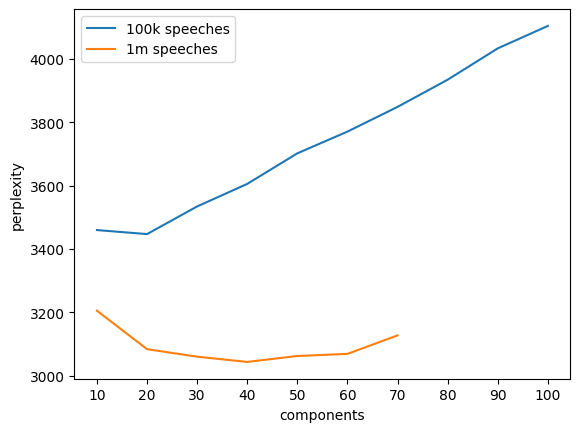

In [26]:
plt.plot(perplexity_100k)
plt.plot(perplexity_1m)
plt.xticks(range(0, 10), np.arange(10, 101, 10))
plt.xlabel("components")
plt.ylabel("perplexity")
plt.legend(["100k speeches", "1m speeches"])
plt.show()

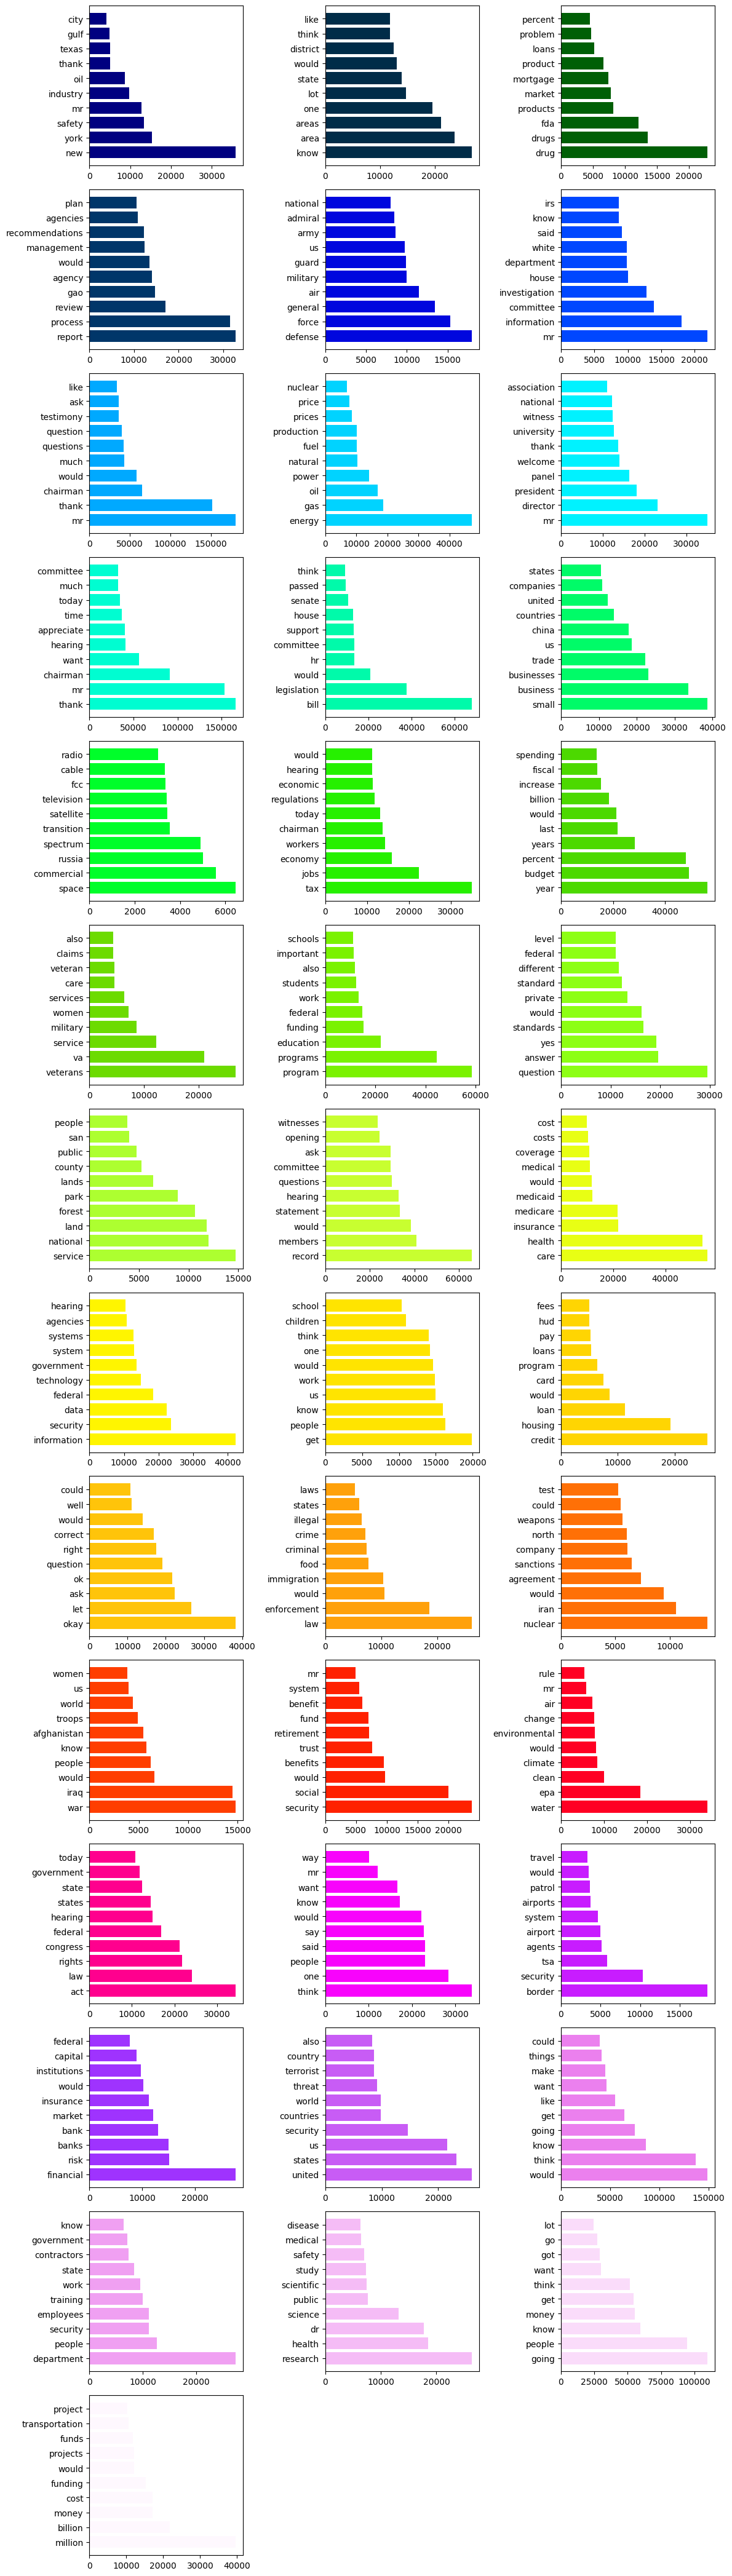

In [27]:
with open("data/interim/lda/1m_speeches_40_components.pickle", "rb") as f:
    lda = pickle.load(f)

plot_groups(pd.DataFrame(lda.components_, columns=count_vectorizer.get_feature_names_out()))
